In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

## Slater-Koster table of hopping integrals

Start with d orbitals only, might extend in the future

In [2]:
#E_s,s
def Ess(l,m,n):
    return Vssσ

#E_s,x
def Esp1(l,m,n):
    return l*Vspσ

#E_x,x
def Ep1p1(l,m,n):
    return l*l*Vppσ+(1-l*l)*Vppπ

#E_x,y
def Ep1p2(l,m,n):
    return l*m*Vppσ-l*m*Vppπ

#E_x,z
def Ep1p3(l,m,n):
    return l*n*Vppσ-l*n*Vppπ



In [3]:
#E_xy,xy
def Ed1d1(l,m,n):
    return 3*l*l*m*m*Vddσ+(l*l+m*m-4*l*l*m*m)*Vddπ+(n*n+l*l*m*m)*Vddδ

#E_yz,yz
def Ed2d2(l,m,n):
    return Ed1d1(m,n,l)

#E_zx,zx
def Ed3d3(l,m,n):
    return Ed1d1(n,l,m)

#E_xy,yz
def Ed1d2(l,m,n):
    return 3*l*m*m*n*Vddσ+l*n*(1-4*m*m)*Vddπ+l*n*(m*m-1)*Vddδ

#E_xy,zx
def Ed1d3(l,m,n):
    return 3*l*l*m*n*Vddσ+m*n*(1-4*l*l)*Vddπ+m*n*(l*l-1)*Vddδ

#E_yz,zx
def Ed2d3(l,m,n):
    return Ed1d2(m,n,l)

#E_xy,x^2-y^2
def Ed1d4(l,m,n):
    return 3/2*l*m*(l*l-m*m)*Vddσ+2*l*m*(m*m-l*l)*Vddπ+1/2*l*m*(l*l-m*m)*Vddδ

#E_yz,x^2-y^2
def Ed2d4(l,m,n):
    return 3/2*n*m*(l*l-m*m)*Vddσ-n*m*(1+2*(l*l-m*m))*Vddπ+m*n*(1+1/2*(l*l-m*m))*Vddδ

#E_zx,x^2-y^2
def Ed3d4(l,m,n):
    return 3/2*l*n*(l*l-m*m)*Vddσ+n*l*(1-2*(l*l-m*m))*Vddπ-l*n*(1-1/2*(l*l-m*m))*Vddδ

#E_xy,3z^2-r^2
def Ed1d5(l,m,n):
    return 3**0.5*(l*m*(n*n-0.5*(l*l+m*m))*Vddσ-2*l*m*n*n*Vddπ+0.5*l*m*(1+n*n)*Vddδ)

#E_yz,3z^2-r^2
def Ed2d5(l,m,n):
    return 3**0.5*(m*n*(n*n-0.5*(l*l+m*m))*Vddσ+m*n*(l*l+m*m-n*n)*Vddπ-0.5*n*m*(l*l+m*m)*Vddδ)

#E_zx,3z^2-r^2
def Ed3d5(l,m,n):
    return 3**0.5*(l*n*(n*n-0.5*(l*l+m*m))*Vddσ+l*n*(l*l+m*m-n*n)*Vddπ-0.5*n*l*(l*l+m*m)*Vddδ)

#E_x^2-y^2,x^2-y^2
def Ed4d4(l,m,n):
    return 3/4*(l*l-m*m)**2*Vddσ+(l*l+m*m-(l*l-m*m)**2)*Vddπ+(n*n+1/4*(l*l-m*m)**2)*Vddδ

#E_x^2-y^2,3z^2-r^2
def Ed4d5(l,m,n):
    return 3**0.5*(0.5*(l*l-m*m)*(n*n-0.5*(l*l+m*m))*Vddσ+n*n*(m*m-l*l)*Vddπ+0.25*(1+n*n)*(l*l-m*m)*Vddδ)


#E_3z^2-r^2,3z^2-r^2
def Ed5d5(l,m,n):
    return (n*n-0.5*(l*l+m*m))**2*Vddσ+3*n*n*(l*l+m*m)*Vddπ+0.75*(l*l+m*m)**2*Vddδ

For each one of the nearest neighbours, we construct a matrix with each row $j$ being an orbital state we are coming from and column $j$ the state we are going to.

Vector linking to the n.n.: $\vec{d}=(d_x,d_y,d_z)$

Directional cosines: $(l,m,n)=\frac{1}{\sqrt{d_x^2+d_y^2+d_z^2}}(d_x,d_y,d_z)$

Wavevector: $\vec{k}=(k_x,k_y,k_z)$

Each element $(i,j)$ is given by $exp(i\vec{k}\cdot \vec{d}) E_{ij}(l,m,n)$

Than sum these matricies for each n. n. and also on-site energies to get the final matrix to solve.


## BCC lattice

In [40]:
a=2/3**0.5 #Artibrary lattice parameter, will only determine the size of the 1st Brillouin zone (=2pi/a)

#Reciprocal lattice vectors
b1=2*np.pi/a*np.array([1,1,0])
b2=2*np.pi/a*np.array([1,0,1])
b3=2*np.pi/a*np.array([0,1,1])
        
#Next nearest neighbours at:
d1=a/2*np.array([1,1,1])
d2=a/2*np.array([-1,1,1])
d3=a/2*np.array([1,-1,1])
d4=a/2*np.array([1,1,-1])
d5=a/2*np.array([-1,-1,1])
d6=a/2*np.array([-1,1,-1])
d7=a/2*np.array([1,-1,-1])
d8=a/2*np.array([-1,-1,-1])

nn=[d1,d2,d3,d4,d5,d6,d7,d8]

#next nearest neighbours at:
d9=a*np.array([1,0,0])
d10=a*np.array([0,1,0])
d11=a*np.array([0,0,1])
d12=a*np.array([-1,0,0])
d13=a*np.array([0,-1,0])
d14=a*np.array([0,0,-1])

nnn=[d9,d10,d11,d12,d13,d14]

In [22]:
ϵd=0
#Vddσ=-16.2
#Vddπ=8.75
#Vddδ=0

Vddσ=-2.4
Vddπ=1.6
Vddδ=-0.4

def Hamilotnian(k,nn):
    H=np.zeros((5,5),dtype='complex_')
    H[0,0]=ϵd
    H[1,1]=ϵd
    H[2,2]=ϵd
    H[3,3]=ϵd
    H[4,4]=ϵd

    for d in nn:
        norm=(d[0]**2+d[1]**2+d[2]**2)**0.5
        l,m,n=d[0]/norm,d[1]/norm,d[2]/norm
        
        H[0,0]+=np.exp(1j*np.dot(d,k))*Ed1d1(l,m,n)
        H[1,0]+=np.exp(1j*np.dot(d,k))*Ed1d2(l,m,n)
        H[0,1]+=np.exp(1j*np.dot(d,k))*Ed1d2(l,m,n)
        H[2,0]+=np.exp(1j*np.dot(d,k))*Ed1d3(l,m,n)
        H[0,2]+=np.exp(1j*np.dot(d,k))*Ed1d3(l,m,n)
        H[3,0]+=np.exp(1j*np.dot(d,k))*Ed1d4(l,m,n)
        H[0,3]+=np.exp(1j*np.dot(d,k))*Ed1d4(l,m,n)
        H[4,0]+=np.exp(1j*np.dot(d,k))*Ed1d5(l,m,n)
        H[0,4]+=np.exp(1j*np.dot(d,k))*Ed1d5(l,m,n)
        
        H[1,1]+=np.exp(1j*np.dot(d,k))*Ed2d2(l,m,n)
        H[2,1]+=np.exp(1j*np.dot(d,k))*Ed2d3(l,m,n)
        H[1,2]+=np.exp(1j*np.dot(d,k))*Ed2d3(l,m,n)
        H[3,1]+=np.exp(1j*np.dot(d,k))*Ed2d4(l,m,n)
        H[1,3]+=np.exp(1j*np.dot(d,k))*Ed2d4(l,m,n)
        H[4,1]+=np.exp(1j*np.dot(d,k))*Ed2d5(l,m,n)
        H[1,4]+=np.exp(1j*np.dot(d,k))*Ed2d5(l,m,n)
        
        H[2,2]+=np.exp(1j*np.dot(d,k))*Ed3d3(l,m,n)
        H[3,2]+=np.exp(1j*np.dot(d,k))*Ed3d4(l,m,n)
        H[2,3]+=np.exp(1j*np.dot(d,k))*Ed3d4(l,m,n)
        H[4,2]+=np.exp(1j*np.dot(d,k))*Ed3d5(l,m,n)
        H[2,4]+=np.exp(1j*np.dot(d,k))*Ed3d5(l,m,n)
        
        H[3,3]+=np.exp(1j*np.dot(d,k))*Ed4d4(l,m,n)
        H[4,3]+=np.exp(1j*np.dot(d,k))*Ed4d5(l,m,n)
        H[3,4]+=np.exp(1j*np.dot(d,k))*Ed4d5(l,m,n)
        
        H[4,4]+=np.exp(1j*np.dot(d,k))*Ed5d5(l,m,n)
        
    return H

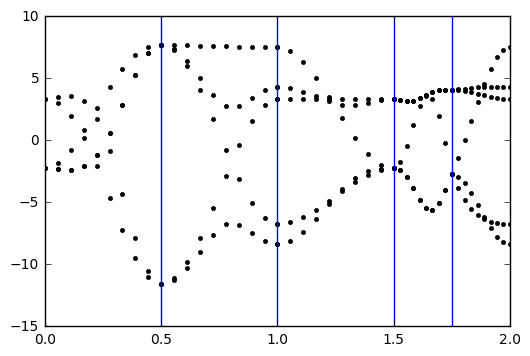

In [23]:
for u in np.linspace(0,0.5,10):
    k=u*b1+u*b2-u*b3
    H=Hamilotnian(k,nn)
    H+=Hamilotnian(k,nnn)*(2/3**0.5)**(-5)
    eigval,eigvec=np.linalg.eigh(H)
    plt.plot([u]*5,eigval,'k.')
for u in np.linspace(0,0.5,10):
    k=-u*b1+1/2*b2+u*b3
    H=Hamilotnian(k,nn)
    H+=Hamilotnian(k,nnn)*(2/3**0.5)**(-5)
    eigval,eigvec=np.linalg.eigh(H)
    plt.plot([-u+1]*5,eigval,'k.')
for u in np.linspace(0,0.5,10):
    k=0*b1+u*b2+0*b3
    H=Hamilotnian(k,nn)
    H+=Hamilotnian(k,nnn)*(2/3**0.5)**(-5)
    eigval,eigvec=np.linalg.eigh(H)
    plt.plot([-u+1.5]*5,eigval,'k.')
for u in np.linspace(0,0.25,10):
    k=u*b1+u*b2+u*b3
    H=Hamilotnian(k,nn)
    H+=Hamilotnian(k,nnn)*(2/3**0.5)**(-5)
    eigval,eigvec=np.linalg.eigh(H)
    plt.plot([u+1.5]*5,eigval,'k.')
for u in np.linspace(0,0.25,10):
    k=u*b1+(1/2-u)*b2+u*b3
    H=Hamilotnian(k,nn)
    H+=Hamilotnian(k,nnn)*(2/3**0.5)**(-5)
    eigval,eigvec=np.linalg.eigh(H)
    plt.plot([-u+2]*5,eigval,'k.')
    
plt.axvline(x=0.5)
plt.axvline(x=1)
plt.axvline(x=1.5)
plt.axvline(x=1.75)



<img src='BCC band structure.png'>

(array([   208.,    342.,    532.,    624.,    684.,    952.,   1362.,
          2514.,   3834.,   5428.,  14042.,  15710.,  14596.,  13718.,
         12754.,  10714.,   9308.,   8222.,   7274.,   3708.,   2904.,
          2896.,   3756.,   4724.,   5190.,   6026.,   6644.,   8888.,
         11088.,  16780.,  23878.,  26892.,  22818.,   7834.,   7420.,
          7210.,   7546.,   7298.,   7588.,   6094.]),
 array([ -1.15308215e+01,  -1.10501707e+01,  -1.05695198e+01,
         -1.00888690e+01,  -9.60821822e+00,  -9.12756741e+00,
         -8.64691660e+00,  -8.16626579e+00,  -7.68561498e+00,
         -7.20496417e+00,  -6.72431336e+00,  -6.24366255e+00,
         -5.76301173e+00,  -5.28236092e+00,  -4.80171011e+00,
         -4.32105930e+00,  -3.84040849e+00,  -3.35975768e+00,
         -2.87910687e+00,  -2.39845606e+00,  -1.91780525e+00,
         -1.43715444e+00,  -9.56503627e-01,  -4.75852816e-01,
          4.79799441e-03,   4.85448805e-01,   9.66099616e-01,
          1.44675043e+00,   1.92

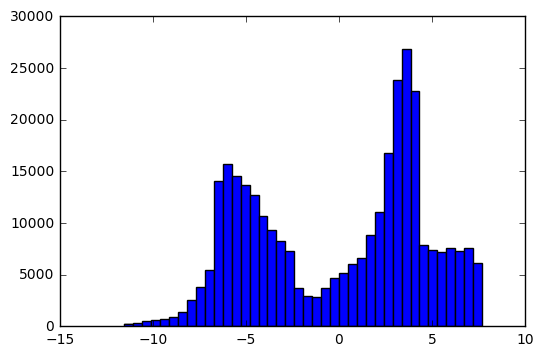

In [42]:
N=40
energies_BCC=[]
for p in np.arange(1,N+1):
    up=(2*p-N-1)/(2*N)
    for q in np.arange(1,N+1):
        uq=(2*q-N-1)/(2*N)
        for r in np.arange(1,N+1):
            ur=(2*r-N-1)/(2*N)
            k=up*b1+uq*b2+ur*b3
            H=Hamilotnian(k,nn)
            H+=Hamilotnian(k,nnn)*(2/3**0.5)**(-5)
            eigval,eigvec=np.linalg.eigh(H)
            energies_BCC=np.append(energies_BCC,eigval)
plt.hist(energies_BCC,40)

## FCC lattice


In [8]:
a=2**0.5 #Artibrary lattice parameter, will only determine the size of the 1st Brillouin zone (=2pi/a)

#Reciprocal lattice vectors
b1=2*np.pi/a*np.array([-1,1,1])
b2=2*np.pi/a*np.array([1,-1,1])
b3=2*np.pi/a*np.array([1,1,-1])
        
#Nearest neighbours at:
d1=a/2*np.array([1,1,0])
d2=a/2*np.array([1,-1,0])
d3=a/2*np.array([-1,-1,0])
d4=a/2*np.array([-1,1,0])
d5=a/2*np.array([1,0,1])
d6=a/2*np.array([-1,0,-1])
d7=a/2*np.array([1,0,-1])
d8=a/2*np.array([-1,0,1])
d9=a/2*np.array([0,1,1])
d10=a/2*np.array([0,-1,-1])
d11=a/2*np.array([0,1,-1])
d12=a/2*np.array([0,-1,1])

nn=[d1,d2,d3,d4,d5,d6,d7,d8,d9,d10,d11,d12]

[-6.4 -2.4 -2.4  3.6  7.6]


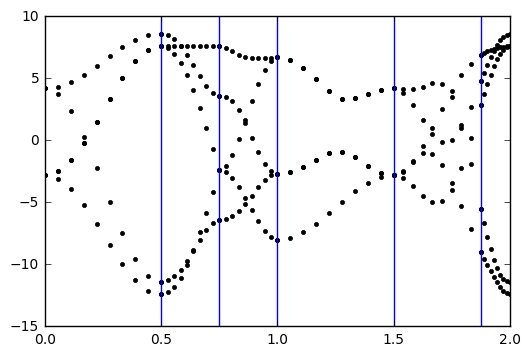

In [9]:
for u in np.linspace(0,0.5,10):
    k=0*b1+u*b2+u*b3
    H=Hamilotnian(k,nn)
    eigval,eigvec=np.linalg.eigh(H)
    plt.plot([u]*5,eigval,'k.')
for u in np.linspace(0,0.25,10):
    k=u*b1+(1/2+u)*b2+1/2*b3
    H=Hamilotnian(k,nn)
    eigval,eigvec=np.linalg.eigh(H)
    plt.plot([u+0.5]*5,eigval,'k.')
print(eigval)
for u in np.linspace(0,0.25,10):
    k=(1/2-u)*b1+(1/2+u)*b2+1/2*b3
    H=Hamilotnian(k,nn)
    eigval,eigvec=np.linalg.eigh(H)
    plt.plot([-u+1]*5,eigval,'k.')
for u in np.linspace(0,0.5,10):
    k=u*b1+u*b2+u*b3
    H=Hamilotnian(k,nn)
    eigval,eigvec=np.linalg.eigh(H)
    plt.plot([-u+1.5]*5,eigval,'k.')
for u in np.linspace(0,3/8,10):
    k=u*b1+2*u*b2+u*b3
    H=Hamilotnian(k,nn)
    eigval,eigvec=np.linalg.eigh(H)
    plt.plot([u+1.5]*5,eigval,'k.')
for u in np.linspace(0,0.125,10):
    k=2*u*b1+(1/2+u)*b2+(1/2+u)*b3
    H=Hamilotnian(k,nn)
    eigval,eigvec=np.linalg.eigh(H)
    plt.plot([-u+2]*5,eigval,'k.')

plt.axvline(x=0.5)
plt.axvline(x=0.75)
plt.axvline(x=1)
plt.axvline(x=1.5)
plt.axvline(x=1.5+3/8)

<img src='FCC band structure.png'>

(array([   366.,    708.,   1332.,   1926.,   2532.,   2790.,   3438.,
          4164.,   5208.,   7384.,  10936.,  12368.,  11026.,   9836.,
          8234.,   8968.,   8930.,   7818.,   6658.,   6010.,   6646.,
          9900.,   7680.,   9840.,   9216.,   7986.,   7458.,   8406.,
          9828.,  12398.,  13202.,  11420.,  12226.,  11414.,  11488.,
         13088.,  18572.,  13986.,   3720.,    894.]),
 array([-12.38091981, -11.85672713, -11.33253444, -10.80834175,
        -10.28414907,  -9.75995638,  -9.2357637 ,  -8.71157101,
         -8.18737832,  -7.66318564,  -7.13899295,  -6.61480027,
         -6.09060758,  -5.56641489,  -5.04222221,  -4.51802952,
         -3.99383684,  -3.46964415,  -2.94545146,  -2.42125878,
         -1.89706609,  -1.37287341,  -0.84868072,  -0.32448803,
          0.19970465,   0.72389734,   1.24809002,   1.77228271,
          2.2964754 ,   2.82066808,   3.34486077,   3.86905345,
          4.39324614,   4.91743883,   5.44163151,   5.9658242 ,
          6.49

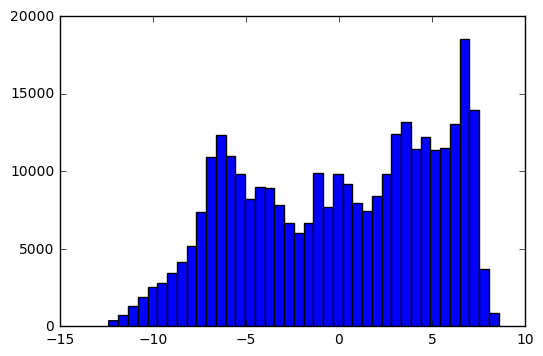

In [10]:
N=40
energies_FCC=[]
for p in np.arange(1,N+1):
    up=(2*p-N-1)/(2*N)
    for q in np.arange(1,N+1):
        uq=(2*q-N-1)/(2*N)
        for r in np.arange(1,N+1):
            ur=(2*r-N-1)/(2*N)
            k=up*b1+uq*b2+ur*b3
            H=Hamilotnian(k,nn)
            eigval,eigvec=np.linalg.eigh(H)
            energies_FCC=np.append(energies_FCC,eigval)
plt.hist(energies_FCC,40)

## HCP lattice

In [11]:
a=1 #Artibrary lattice parameter, will only determine the size of the 1st Brillouin zone (=2pi/a)
c=np.sqrt(8/3)*a


#Reciprocal lattice vectors
b1=2*np.pi/a*np.array([-1,1/3**0.5,0])
b2=2*np.pi/a*np.array([0,-2/3**0.5,0])
b3=2*np.pi/a*np.array([0,0,(3/8)**0.5])
        
#Nearest neighbours at:
d1=a*np.array([1,0,0])
d2=a*np.array([-1,0,0])
d3=a/2*np.array([1,3**0.5,0])
d4=a/2*np.array([1,-3**0.5,0])
d5=a/2*np.array([-1,3**0.5,0])
d6=a/2*np.array([-1,-3**0.5,0])

d7=a/2*np.array([1,1/3**0.5,np.sqrt(8/3)])
d8=a/2*np.array([1,1/3**0.5,-np.sqrt(8/3)])
d9=a/2*np.array([-1,1/3**0.5,np.sqrt(8/3)])
d10=a/2*np.array([-1,1/3**0.5,-np.sqrt(8/3)])
d11=a*np.array([0,-1/3**0.5,np.sqrt(2/3)])
d12=a*np.array([0,-1/3**0.5,-np.sqrt(2/3)])

nn1to1=[d1,d2,d3,d4,d5,d6]
nn1to2=[d7,d8,d9,d10,d11,d12]
nn2to1=[-d7,-d8,-d9,-d10,-d11,-d12]

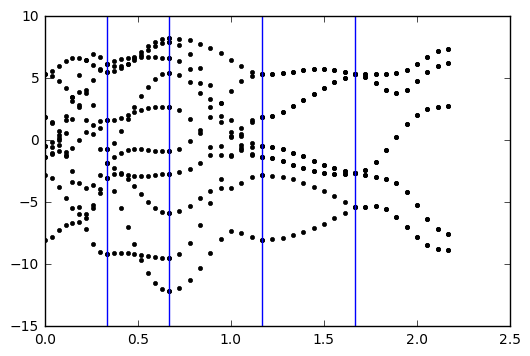

In [12]:
for u in np.linspace(0,1/3,10):
    k=2*u*b1+u*b2+0*b3
    H=np.zeros((10,10),dtype='complex_')
    H[:5,:5]=Hamilotnian(k,nn1to1)
    H[5:,5:]=Hamilotnian(k,nn1to1)
    H[5:,:5]=Hamilotnian(k,nn1to2)
    H[:5,5:]=Hamilotnian(k,nn2to1)
    eigval,eigvec=np.linalg.eigh(H)
    plt.plot([u]*10,eigval,'k.')
for u in np.linspace(0,1/3,10):
    k=(1/2+u/2)*b1+u*b2+0*b3
    H=np.zeros((10,10),dtype='complex_')
    H[:5,:5]=Hamilotnian(k,nn1to1)
    H[5:,5:]=Hamilotnian(k,nn1to1)
    H[5:,:5]=Hamilotnian(k,nn1to2)
    H[:5,5:]=Hamilotnian(k,nn2to1)
    eigval,eigvec=np.linalg.eigh(H)
    plt.plot([-u+2/3]*10,eigval,'k.')
for u in np.linspace(0,0.5,10):
    k=u*b1+0*b2+0*b3
    H=np.zeros((10,10),dtype='complex_')
    H[:5,:5]=Hamilotnian(k,nn1to1)
    H[5:,5:]=Hamilotnian(k,nn1to1)
    H[5:,:5]=Hamilotnian(k,nn1to2)
    H[:5,5:]=Hamilotnian(k,nn2to1)
    eigval,eigvec=np.linalg.eigh(H)
    plt.plot([-u+2/3+0.5]*10,eigval,'k.')
for u in np.linspace(0,0.5,10):
    k=0*b1+0*b2+u*b3
    H=np.zeros((10,10),dtype='complex_')
    H[:5,:5]=Hamilotnian(k,nn1to1)
    H[5:,5:]=Hamilotnian(k,nn1to1)
    H[5:,:5]=Hamilotnian(k,nn1to2)
    H[:5,5:]=Hamilotnian(k,nn2to1)
    eigval,eigvec=np.linalg.eigh(H)
    plt.plot([u+2/3+1/2]*10,eigval,'k.')
for u in np.linspace(0,0.5,10):
    k=u*b1+0*b2+1/2*b3
    H=np.zeros((10,10),dtype='complex_')
    H[:5,:5]=Hamilotnian(k,nn1to1)
    H[5:,5:]=Hamilotnian(k,nn1to1)
    H[5:,:5]=Hamilotnian(k,nn1to2)
    H[:5,5:]=Hamilotnian(k,nn2to1)
    eigval,eigvec=np.linalg.eigh(H)
    plt.plot([u+2/3+1]*10,eigval,'k.')
plt.axvline(x=1/3)
plt.axvline(x=2/3)
plt.axvline(x=2/3+0.5)
plt.axvline(x=2/3+1)



<img src='HCP band structure.png'>

(array([   704.,   1332.,   1912.,   2736.,   5564.,   9128.,  11952.,
         12672.,  13552.,  15920.,  15032.,  13284.,  15184.,  16224.,
         18396.,  20900.,  20128.,  19252.,  17008.,  14256.,  15712.,
         17968.,  19300.,  14160.,  10956.,  11488.,  19624.,  21104.,
         18288.,  18136.,  18636.,  22260.,  22896.,  23480.,  26528.,
         29820.,  31628.,  31148.,  18548.,   3184.]),
 array([-12.13586616, -11.62596492, -11.11606369, -10.60616245,
        -10.09626122,  -9.58635998,  -9.07645874,  -8.56655751,
         -8.05665627,  -7.54675504,  -7.0368538 ,  -6.52695257,
         -6.01705133,  -5.50715009,  -4.99724886,  -4.48734762,
         -3.97744639,  -3.46754515,  -2.95764392,  -2.44774268,
         -1.93784144,  -1.42794021,  -0.91803897,  -0.40813774,
          0.1017635 ,   0.61166474,   1.12156597,   1.63146721,
          2.14136844,   2.65126968,   3.16117091,   3.67107215,
          4.18097339,   4.69087462,   5.20077586,   5.71067709,
          6.22

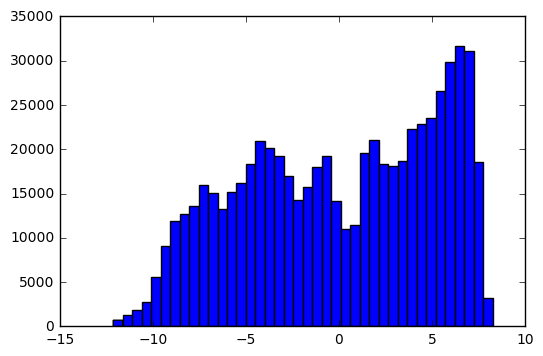

In [13]:
N=40
energies_HCP=[]
for p in np.arange(1,N+1):
    up=(2*p-N-1)/(2*N)
    for q in np.arange(1,N+1):
        uq=(2*q-N-1)/(2*N)
        for r in np.arange(1,N+1):
            ur=(2*r-N-1)/(2*N)
            k=up*b1+uq*b2+ur*b3
            H=np.zeros((10,10),dtype='complex_')
            H[:5,:5]=Hamilotnian(k,nn1to1)
            H[5:,5:]=Hamilotnian(k,nn1to1)
            H[5:,:5]=Hamilotnian(k,nn1to2)
            H[:5,5:]=Hamilotnian(k,nn1to2)
            eigval,eigvec=np.linalg.eigh(H)
            energies_HCP=np.append(energies_HCP,eigval)
plt.hist(energies_HCP,40)

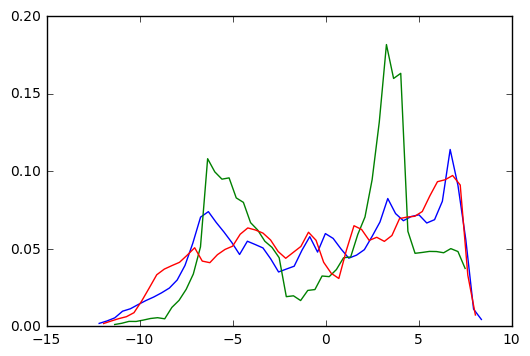

In [26]:
hist, bins = np.histogram(energies_FCC, bins=50, density=True)
bin_centers = (bins[1:]+bins[:-1])*0.5

n_FCC=np.cumsum(hist*(bins[1]-bins[0]))
Eb_FCC=np.cumsum(hist*(bins[1]-bins[0])*bin_centers)

plt.plot(bin_centers,hist)

hist, bins = np.histogram(energies_BCC, bins=50, density=True)
bin_centers = (bins[1:]+bins[:-1])*0.5

n_BCC=np.cumsum(hist*(bins[1]-bins[0]))
Eb_BCC=np.cumsum(hist*(bins[1]-bins[0])*bin_centers)

plt.plot(bin_centers,hist)

hist, bins = np.histogram(energies_HCP, bins=50, density=True)
bin_centers = (bins[1:]+bins[:-1])*0.5

n_HCP=np.cumsum(hist*(bins[1]-bins[0]))
Eb_HCP=np.cumsum(hist*(bins[1]-bins[0])*bin_centers)

plt.plot(bin_centers,hist)

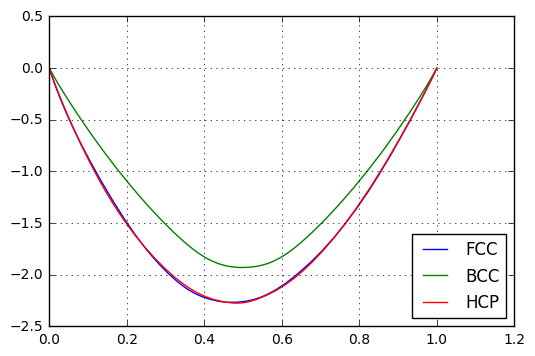

In [15]:
plt.plot(n_FCC,Eb_FCC,label='FCC')
plt.plot(n_BCC,Eb_BCC,label='BCC')
plt.plot(n_HCP,Eb_HCP,label='HCP')
plt.legend(loc=4)
plt.grid()

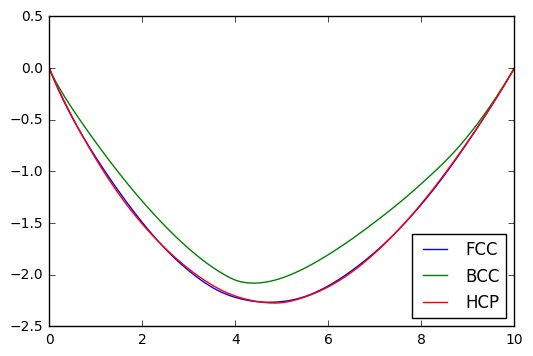

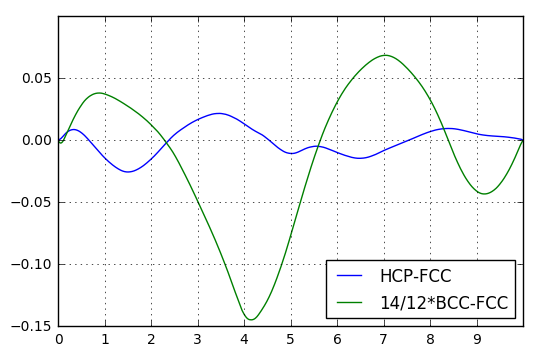

In [55]:
plt.plot(np.linspace(0,10,len(energies_FCC)*2),np.cumsum(np.sort(np.repeat(energies_FCC,2)))/len(energies_FCC)/2, label='FCC')
plt.plot(np.linspace(0,10,len(energies_BCC)*2),np.cumsum(np.sort(np.repeat(energies_BCC,2)))/len(energies_BCC)/2, label='BCC')
plt.plot(np.linspace(0,10,len(energies_HCP)),np.cumsum(np.sort(energies_HCP))/len(energies_HCP),label='HCP')
plt.legend(loc=4)

plt.figure()
ax=plt.gca()
ax.set_xticks(np.arange(10))
plt.grid()
plt.plot(np.linspace(0,10,len(energies_HCP)),np.cumsum(np.sort(energies_HCP))/len(energies_HCP)-np.cumsum(np.sort(np.repeat(energies_FCC,2)))/len(energies_FCC)/2, label='HCP-FCC')
plt.plot(np.linspace(0,10,len(energies_HCP)),np.cumsum(np.sort(np.repeat(energies_BCC*1.15,2)))/len(energies_BCC)/2-np.cumsum(np.sort(np.repeat(energies_FCC,2)))/len(energies_FCC)/2,label='14/12*BCC-FCC')
plt.legend(loc=4)

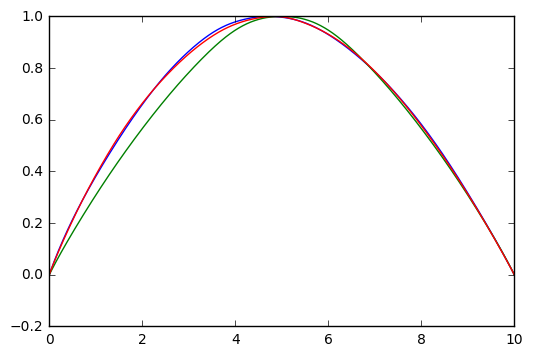

In [17]:
plt.plot(np.linspace(0,10,len(energies_FCC)),np.cumsum(np.sort(energies_FCC))/len(energies_FCC)/min(np.cumsum(np.sort(energies_FCC))/len(energies_FCC)))
plt.plot(np.linspace(0,10,len(energies_BCC)),np.cumsum(np.sort(energies_BCC))/len(energies_BCC)/min(np.cumsum(np.sort(energies_BCC))/len(energies_BCC)))
plt.plot(np.linspace(0,10,len(energies_HCP)),np.cumsum(np.sort(energies_HCP))/len(energies_HCP)/min(np.cumsum(np.sort(energies_HCP))/len(energies_HCP)))

In [18]:
import scipy.stats
print(scipy.stats.moment(energies_BCC,0))
print(scipy.stats.moment(energies_BCC,1))
print(scipy.stats.moment(energies_BCC,2))
print(scipy.stats.moment(energies_BCC,3))
print(scipy.stats.moment(energies_BCC,4))

print(scipy.stats.moment(energies_FCC,0))
print(scipy.stats.moment(energies_FCC,1))
print(scipy.stats.moment(energies_FCC,2))
print(scipy.stats.moment(energies_FCC,3))
print(scipy.stats.moment(energies_FCC,4))
print(scipy.stats.moment(energies_FCC,5))

print(scipy.stats.moment(energies_HCP,0))
print(scipy.stats.moment(energies_HCP,1))
print(scipy.stats.moment(energies_HCP,2))
print(scipy.stats.moment(energies_HCP,3))
print(scipy.stats.moment(energies_HCP,4))
print(scipy.stats.moment(energies_HCP,6))

1.0
0.0
17.92
-2.15436557482e-15
468.166806767
1.0
0.0
26.88
-33.426
1320.0405
-4278.0198
1.0
0.0
26.88
-33.426
1316.5454537
84128.6296138


In [56]:
1.15**5

2.0113571874999994

In [64]:
3.756*(3/4)**0.5

3.2527914166143512

In [65]:
3.25/3.22

1.0093167701863353

In [67]:
1.009316**(5)

1.0474560014474945

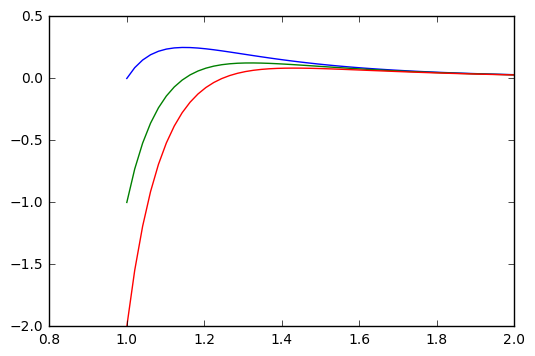

In [77]:
x=np.linspace(1,2)
def E(a):
 return x**(-5)-a*x**(-10)
plt.plot(x,E(1))
plt.plot(x,E(2))
plt.plot(x,E(3))

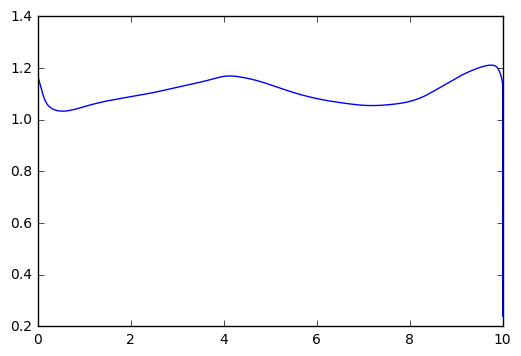

In [80]:
plt.plot(np.linspace(0,10,len(energies_BCC)),np.cumsum(np.sort(energies_BCC))/np.cumsum(np.sort(energies_FCC))/(9.5/12))

In [85]:
Eb_FCC_r0=np.cumsum(np.sort(np.repeat(energies_FCC,2)))/len(energies_FCC)/2
Eb_BCC_r0=np.cumsum(np.sort(np.repeat(energies_BCC,2)))/len(energies_BCC)/2
Eb_HCP_r0=np.cumsum(np.sort(energies_HCP))/len(energies_HCP)

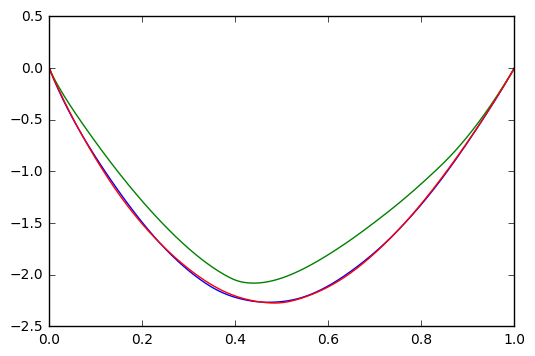

In [86]:
plt.plot(np.linspace(0,1,len(Eb_FCC_r0)),Eb_FCC_r0)
plt.plot(np.linspace(0,1,len(Eb_FCC_r0)),Eb_BCC_r0)
plt.plot(np.linspace(0,1,len(Eb_FCC_r0)),Eb_HCP_r0)

In [95]:
scale_BCC_FCC=Eb_BCC_r0/Eb_FCC_r0/((8+6*(2/3**0.5)**(-10))/12)
scale_HCP_FCC=Eb_HCP_r0/Eb_FCC_r0

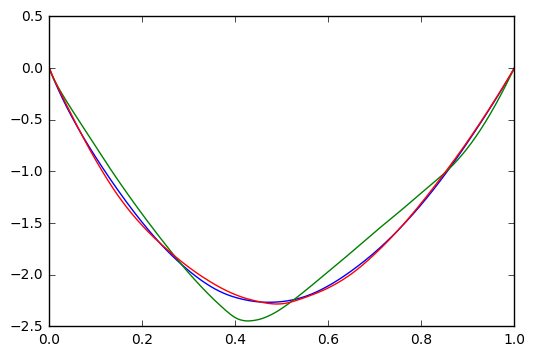

In [96]:
plt.plot(np.linspace(0,1,len(Eb_FCC_r0)),Eb_FCC_r0)
plt.plot(np.linspace(0,1,len(Eb_FCC_r0)),Eb_BCC_r0*scale_BCC_FCC)
plt.plot(np.linspace(0,1,len(Eb_FCC_r0)),Eb_HCP_r0*scale_HCP_FCC)

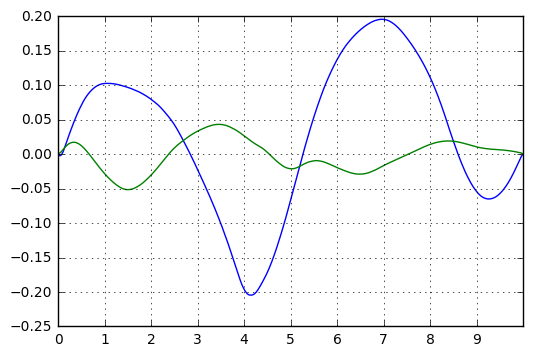

In [97]:
plt.plot(np.linspace(0,10,len(Eb_FCC_r0)),Eb_BCC_r0*scale_BCC_FCC-Eb_FCC_r0)
plt.plot(np.linspace(0,10,len(Eb_FCC_r0)),Eb_HCP_r0*scale_HCP_FCC-Eb_FCC_r0)
ax=plt.gca()
ax.set_xticks(np.arange(10))
plt.grid()

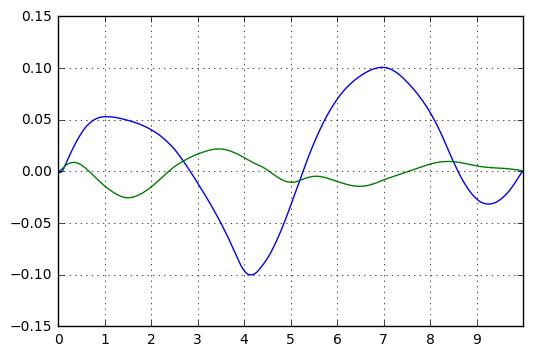

In [98]:
plt.plot(np.linspace(0,10,len(Eb_FCC_r0)),Eb_BCC_r0/((8+6*(2/3**0.5)**(-10))/12)**0.5-Eb_FCC_r0)
plt.plot(np.linspace(0,10,len(Eb_FCC_r0)),Eb_HCP_r0-Eb_FCC_r0)
ax=plt.gca()
ax.set_xticks(np.arange(10))
plt.grid()
